In [1]:
!pip install kaggle
!pip install pydicom

import numpy as np
import pandas as pd
import os
import csv
import random
import pydicom
from matplotlib import pyplot as plt
import matplotlib.patches as patches

     |████████████████████████████████| 35.5MB 119kB/s 


In [4]:
!mkdir .kaggle

In [ ]:
!ls

sample_data


In [2]:
from google.colab import drive
drive.mount("/content/drive")

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
!cp /content/drive/My\ Drive/kaggle.json /content/.kaggle/

In [5]:
import json
token = {"username":"xxxxx007","key":"fed121e948401c3925b228b45c15c928"}
with open('/content/.kaggle/kaggle.json', 'w') as file:

  
    json.dump(token, file)

In [6]:
cd ../root/

/root


In [7]:
!mkdir .kaggle

In [8]:
!cp /content/.kaggle/kaggle.json /root/.kaggle/kaggle.json

In [9]:
!kaggle config set -n path -v /content

- path is now set to: /content


In [10]:
cd ../content

/content


In [11]:
!chmod 600 /root/.kaggle/kaggle.json

In [12]:
!pip uninstall -y kaggle
!pip install --upgrade pip
!pip install kaggle==1.5.6

Uninstalling kaggle-1.5.6:
  Successfully uninstalled kaggle-1.5.6
     |████████████████████████████████| 1.5MB 2.7MB/s 
  Found existing installation: pip 19.3.1
    Uninstalling pip-19.3.1:
      Successfully uninstalled pip-19.3.1
     |████████████████████████████████| 58 kB 1.7 MB/s 
  Created wheel for kaggle: filename=kaggle-1.5.6-py3-none-any.whl size=72859 sha256=2def514ca6082c5b6b0a1a02ddda3a8dff44f76020be7114e9c335c24865c880
  Stored in directory: /root/.cache/pip/wheels/01/3e/ff/77407ebac3ef71a79b9166a8382aecf88415a0bcbe3c095a01
Successfully built kaggle


In [13]:
!kaggle competitions download -c rsna-pneumonia-detection-challenge

100% 3.66G/3.66G [00:50<00:00, 68.4MB/s]
100% 3.66G/3.66G [00:50<00:00, 77.5MB/s]


In [14]:
!unzip '/content/competitions/rsna-pneumonia-detection-challenge/*.zip'

Streaming output truncated to the last 5000 lines.
  inflating: stage_2_train_images/d5252a78-3ea1-48e9-9ffb-e7535be3ce80.dcm  
  inflating: stage_2_train_images/d525eafb-8908-45fd-a942-48d07c435487.dcm  
  inflating: stage_2_train_images/d5265640-17db-4880-866d-d2952e32941c.dcm  
  inflating: stage_2_train_images/d5277276-f8f8-40e9-b8e1-791cf5d96ac0.dcm  
  inflating: stage_2_train_images/d528d9e9-647a-4e2e-a16c-bd5e32a5bbf5.dcm  
  inflating: stage_2_train_images/d5293a3e-f050-4b98-8bbf-1f40e25bced5.dcm  
  inflating: stage_2_train_images/d52cbb5a-1d0a-457d-8c72-0f7aeec21ca7.dcm  
  inflating: stage_2_train_images/d52ce67b-be7c-4349-8dc4-38562928d208.dcm  
  inflating: stage_2_train_images/d535a3c8-c4a4-4856-b5cd-17f6332eac8b.dcm  
  inflating: stage_2_train_images/d5360dc4-6bea-4a7b-bc49-5b2547ad7877.dcm  
  inflating: stage_2_train_images/d5364bc1-bc2a-4bd0-a1bd-0cfb5a369ccc.dcm  
  inflating: stage_2_train_images/d539e101-5662-445c-9f6a-381e674f0aed.dcm  
  inflating: stage_2_trai

In [ ]:
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
!pip install SimpleITK


     |████████████████████████████████| 42.5 MB 34 kB/s 


In [ ]:
import SimpleITK as sitk
from glob import glob

In [ ]:
#import tensorflow as tf
#from tensorflow import keras

In [ ]:
#from skimage import io
#from skimage import measure
#from skimage.transform import resize

In [ ]:
df_train = pd.read_csv('/content/stage_2_train_labels.csv')
df_train.head(10)

patientId      x      y  width  height  Target
0  0004cfab-14fd-4e49-80ba-63a80b6bddd6    NaN    NaN    NaN     NaN       0
1  00313ee0-9eaa-42f4-b0ab-c148ed3241cd    NaN    NaN    NaN     NaN       0
2  00322d4d-1c29-4943-afc9-b6754be640eb    NaN    NaN    NaN     NaN       0
3  003d8fa0-6bf1-40ed-b54c-ac657f8495c5    NaN    NaN    NaN     NaN       0
4  00436515-870c-4b36-a041-de91049b9ab4  264.0  152.0  213.0   379.0       1
5  00436515-870c-4b36-a041-de91049b9ab4  562.0  152.0  256.0   453.0       1
6  00569f44-917d-4c86-a842-81832af98c30    NaN    NaN    NaN     NaN       0
7  006cec2e-6ce2-4549-bffa-eadfcd1e9970    NaN    NaN    NaN     NaN       0
8  00704310-78a8-4b38-8475-49f4573b2dbb  323.0  577.0  160.0   104.0       1
9  00704310-78a8-4b38-8475-49f4573b2dbb  695.0  575.0  162.0   137.0       1

In [ ]:
df_train_1 = pd.read_csv('stage_2_detailed_class_info.csv')
df_train_1.head(10)

patientId                         class
0  0004cfab-14fd-4e49-80ba-63a80b6bddd6  No Lung Opacity / Not Normal
1  00313ee0-9eaa-42f4-b0ab-c148ed3241cd  No Lung Opacity / Not Normal
2  00322d4d-1c29-4943-afc9-b6754be640eb  No Lung Opacity / Not Normal
3  003d8fa0-6bf1-40ed-b54c-ac657f8495c5                        Normal
4  00436515-870c-4b36-a041-de91049b9ab4                  Lung Opacity
5  00436515-870c-4b36-a041-de91049b9ab4                  Lung Opacity
6  00569f44-917d-4c86-a842-81832af98c30  No Lung Opacity / Not Normal
7  006cec2e-6ce2-4549-bffa-eadfcd1e9970  No Lung Opacity / Not Normal
8  00704310-78a8-4b38-8475-49f4573b2dbb                  Lung Opacity
9  00704310-78a8-4b38-8475-49f4573b2dbb                  Lung Opacity

In [ ]:
df_full=pd.merge(df_train,df_train_1,on='patientId')

In [ ]:
df_full.head(10)

patientId  ...                         class
0  0004cfab-14fd-4e49-80ba-63a80b6bddd6  ...  No Lung Opacity / Not Normal
1  00313ee0-9eaa-42f4-b0ab-c148ed3241cd  ...  No Lung Opacity / Not Normal
2  00322d4d-1c29-4943-afc9-b6754be640eb  ...  No Lung Opacity / Not Normal
3  003d8fa0-6bf1-40ed-b54c-ac657f8495c5  ...                        Normal
4  00436515-870c-4b36-a041-de91049b9ab4  ...                  Lung Opacity
5  00436515-870c-4b36-a041-de91049b9ab4  ...                  Lung Opacity
6  00436515-870c-4b36-a041-de91049b9ab4  ...                  Lung Opacity
7  00436515-870c-4b36-a041-de91049b9ab4  ...                  Lung Opacity
8  00569f44-917d-4c86-a842-81832af98c30  ...  No Lung Opacity / Not Normal
9  006cec2e-6ce2-4549-bffa-eadfcd1e9970  ...  No Lung Opacity / Not Normal

[10 rows x 7 columns]

In [ ]:
df_train.shape

(30227, 6)

In [ ]:
df_train_1.shape

(30227, 2)

In [ ]:
df_full.shape

(37629, 7)

In [ ]:
df_full=df_full.drop_duplicates()

In [ ]:
df_full.shape

(30227, 7)

In [ ]:
df_full.describe()

x            y        width       height        Target
count  9555.000000  9555.000000  9555.000000  9555.000000  30227.000000
mean    394.047724   366.839560   218.471376   329.269702      0.316108
std     204.574172   148.940488    59.289475   157.750755      0.464963
min       2.000000     2.000000    40.000000    45.000000      0.000000
25%     207.000000   249.000000   177.000000   203.000000      0.000000
50%     324.000000   365.000000   217.000000   298.000000      0.000000
75%     594.000000   478.500000   259.000000   438.000000      1.000000
max     835.000000   881.000000   528.000000   942.000000      1.000000

In [ ]:
df_full.isnull().sum()

patientId        0
x            20672
y            20672
width        20672
height       20672
Target           0
class            0
dtype: int64

In [ ]:
pd.pivot_table(df_full,index=["Target"], values=['patientId'], aggfunc='count')

patientId
Target           
0           20672
1            9555

In [ ]:
pd.pivot_table(df_full,index=["class"], values=['patientId'], aggfunc='count')

patientId
class                                  
Lung Opacity                       9555
No Lung Opacity / Not Normal      11821
Normal                             8851

In [ ]:
df_full.isnull().sum()

patientId        0
x            20672
y            20672
width        20672
height       20672
Target           0
class            0
dtype: int64

In [ ]:
df_full=df_full.fillna(0.0)

In [ ]:
df_full.isnull().sum()

patientId    0
x            0
y            0
width        0
height       0
Target       0
class        0
dtype: int64

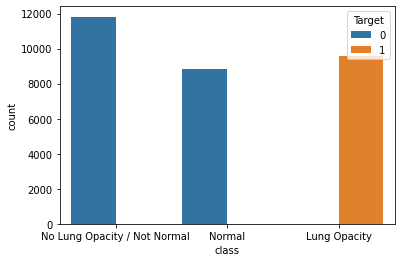

In [ ]:
sns.countplot(x = 'class', hue = 'Target', data = df_full)

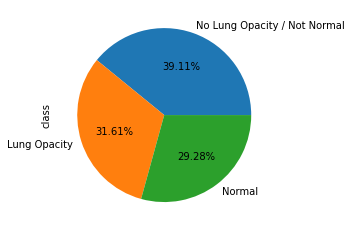

In [ ]:
df_full["class"].value_counts().plot(kind='pie',autopct='%.2f%%')

In [ ]:
df_M = pd.read_csv('stage_2_train_labels.csv')
df_M.head(10)

patientId      x      y  width  height  Target
0  0004cfab-14fd-4e49-80ba-63a80b6bddd6    NaN    NaN    NaN     NaN       0
1  00313ee0-9eaa-42f4-b0ab-c148ed3241cd    NaN    NaN    NaN     NaN       0
2  00322d4d-1c29-4943-afc9-b6754be640eb    NaN    NaN    NaN     NaN       0
3  003d8fa0-6bf1-40ed-b54c-ac657f8495c5    NaN    NaN    NaN     NaN       0
4  00436515-870c-4b36-a041-de91049b9ab4  264.0  152.0  213.0   379.0       1
5  00436515-870c-4b36-a041-de91049b9ab4  562.0  152.0  256.0   453.0       1
6  00569f44-917d-4c86-a842-81832af98c30    NaN    NaN    NaN     NaN       0
7  006cec2e-6ce2-4549-bffa-eadfcd1e9970    NaN    NaN    NaN     NaN       0
8  00704310-78a8-4b38-8475-49f4573b2dbb  323.0  577.0  160.0   104.0       1
9  00704310-78a8-4b38-8475-49f4573b2dbb  695.0  575.0  162.0   137.0       1

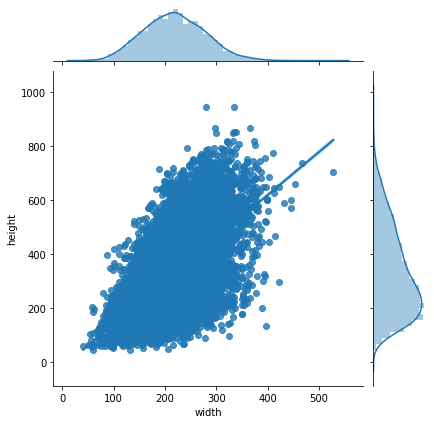

In [ ]:
sns.jointplot(x = 'width', y = 'height', data = df_M, kind="reg")

In [ ]:
Not_Normal = df_full[df_full['class']=='No Lung Opacity / Not Normal'].sample(n=780)
Normal = df_full[df_full['class']=='Normal'].sample(n=580)
Lunge_Opacity = df_full[df_full['class']=='Lung Opacity'].sample(n=640)
frames = [Not_Normal, Normal, Lunge_Opacity]
dicom_df = pd.concat(frames)
dicom_df.shape

(2000, 7)

In [ ]:
import cv2

In [ ]:
def process_dicom_data(data_df):
    for n, Pid in enumerate(data_df['patientId'].unique()):         
        dcm_file = '/content/stage_2_train_images/%s.dcm' % Pid
        dcm_data = pydicom.read_file(dcm_file)       
            
        dcm_data1 = np.array(pydicom.read_file(dcm_file))
        pixels2 = dcm_data1.flatten()



        test2 = np.array(dcm_data.PixelData)
        test1 = test2.flatten()

        idx = (data_df['patientId']==dcm_data.PatientID)
        data_df.loc[idx,'Modality'] = dcm_data.Modality
        data_df.loc[idx,'PatientAge'] = pd.to_numeric(dcm_data.PatientAge)
        data_df.loc[idx,'PatientSex'] = dcm_data.PatientSex
        data_df.loc[idx,'BodyPartExamined'] = dcm_data.BodyPartExamined
        data_df.loc[idx,'ViewPosition'] = dcm_data.ViewPosition
        data_df.loc[idx,'image'] = pixels2
        data_df.loc[idx,'PixelData'] = test1
        

        

               

        
    return data_df



In [ ]:
dicom_df = process_dicom_data(dicom_df)

In [43]:
import pydicom as dcm 
PATH='/content/'

In [ ]:
def show_dicom_images(data):
 img_data = list(data.T.to_dict().values())
 f, ax = plt.subplots(5,5, figsize=(24,28))
 for i,data_row in enumerate(img_data):
   patientImage = data_row['patientId']+'.dcm'
   imagePath = os.path.join(PATH,"/content/stage_2_train_images/",patientImage)
   data_row_img_data = dcm.read_file(imagePath)
   modality = data_row_img_data.Modality
   age = data_row_img_data.PatientAge
   sex = data_row_img_data.PatientSex
   data_row_img = dcm.dcmread(imagePath)
   ax[i//5, i%5].imshow(data_row_img.pixel_array, cmap=plt.cm.bone) 
   ax[i//5, i%5].axis('off')
   ax[i//5, i%5].set_title('ID: {}\nModality: {} Age: {} Sex: {} Target: {}\nClass: {}\nWindow: {}:{}:{}:{}'.format(                 data_row['patientId'],                 modality, age, sex, data_row['Target'], data_row['class'],                  data_row['x'],data_row['y'],data_row['width'],data_row['height']))
 plt.show()

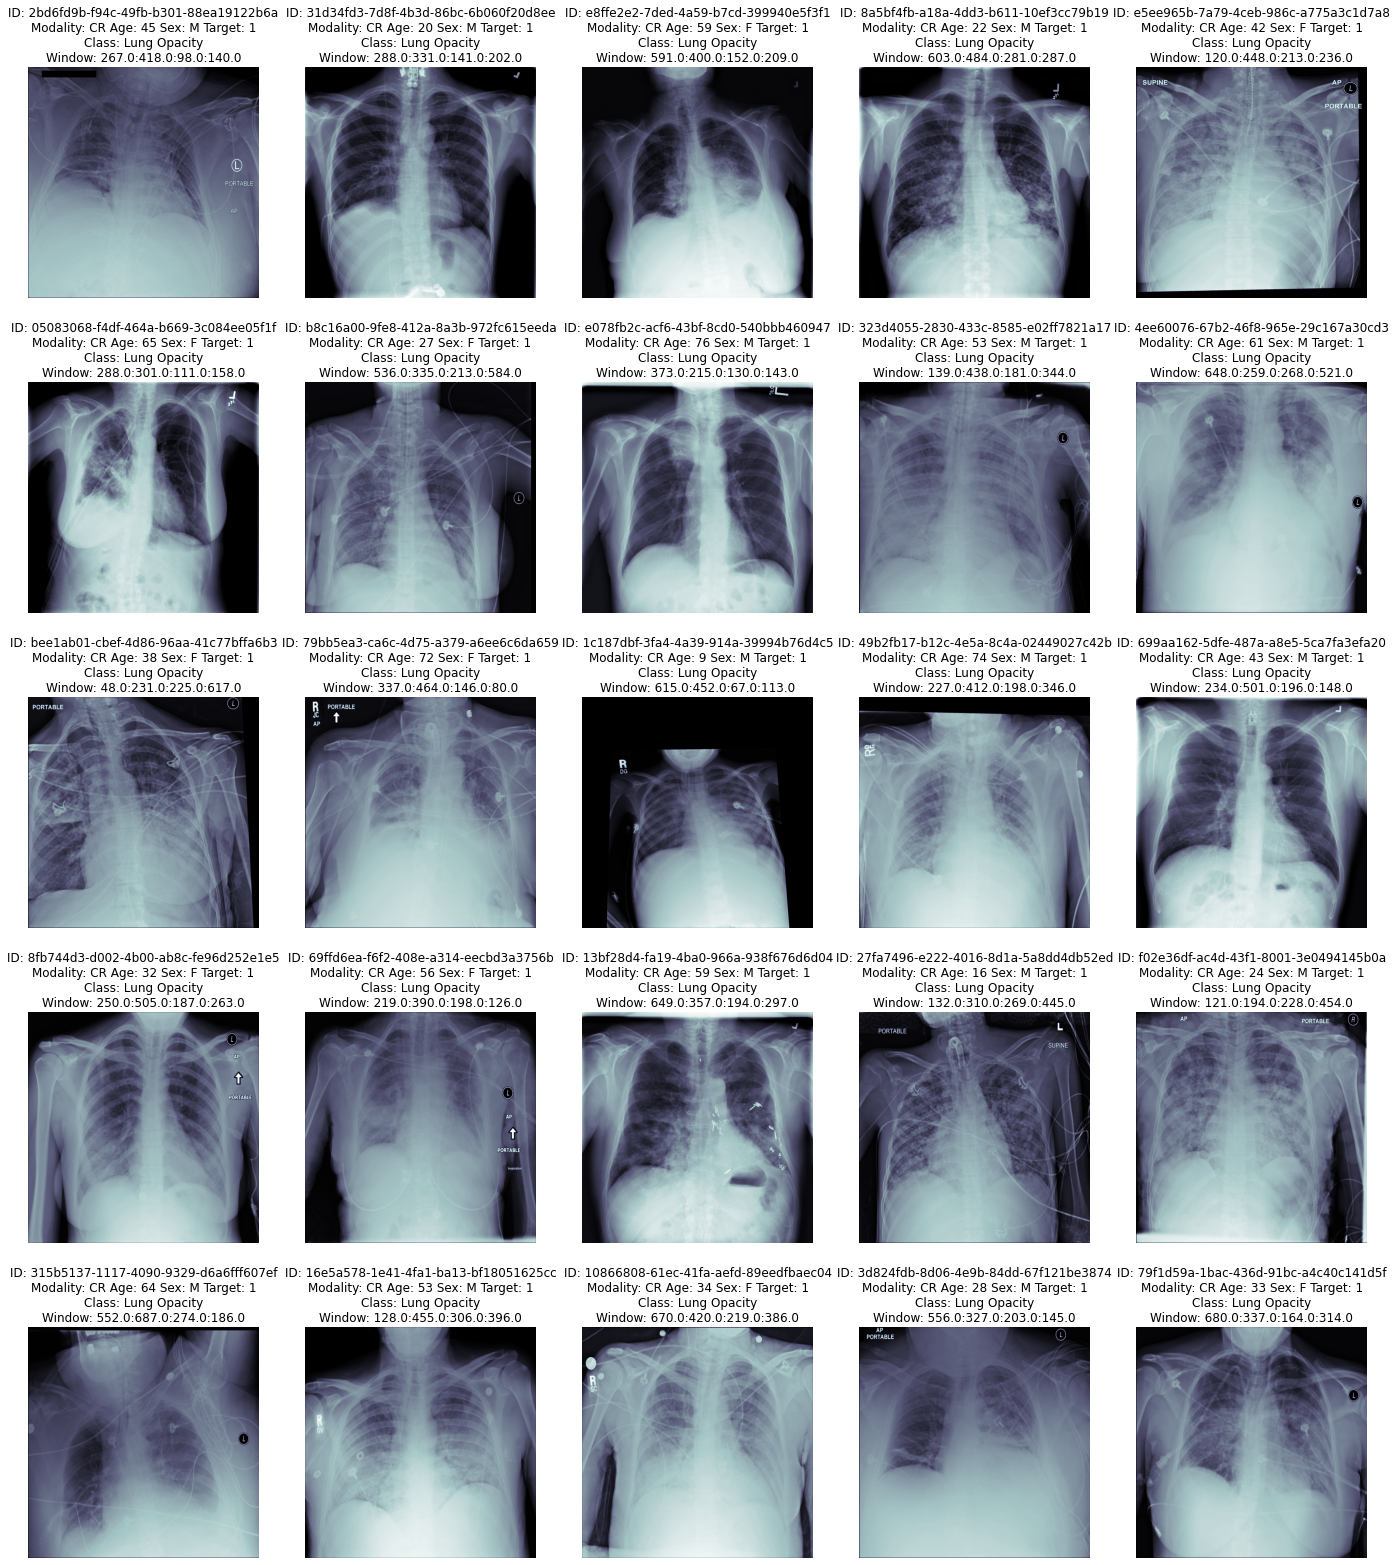

In [ ]:
show_dicom_images(dicom_df[dicom_df['Target']==1].sample(25))

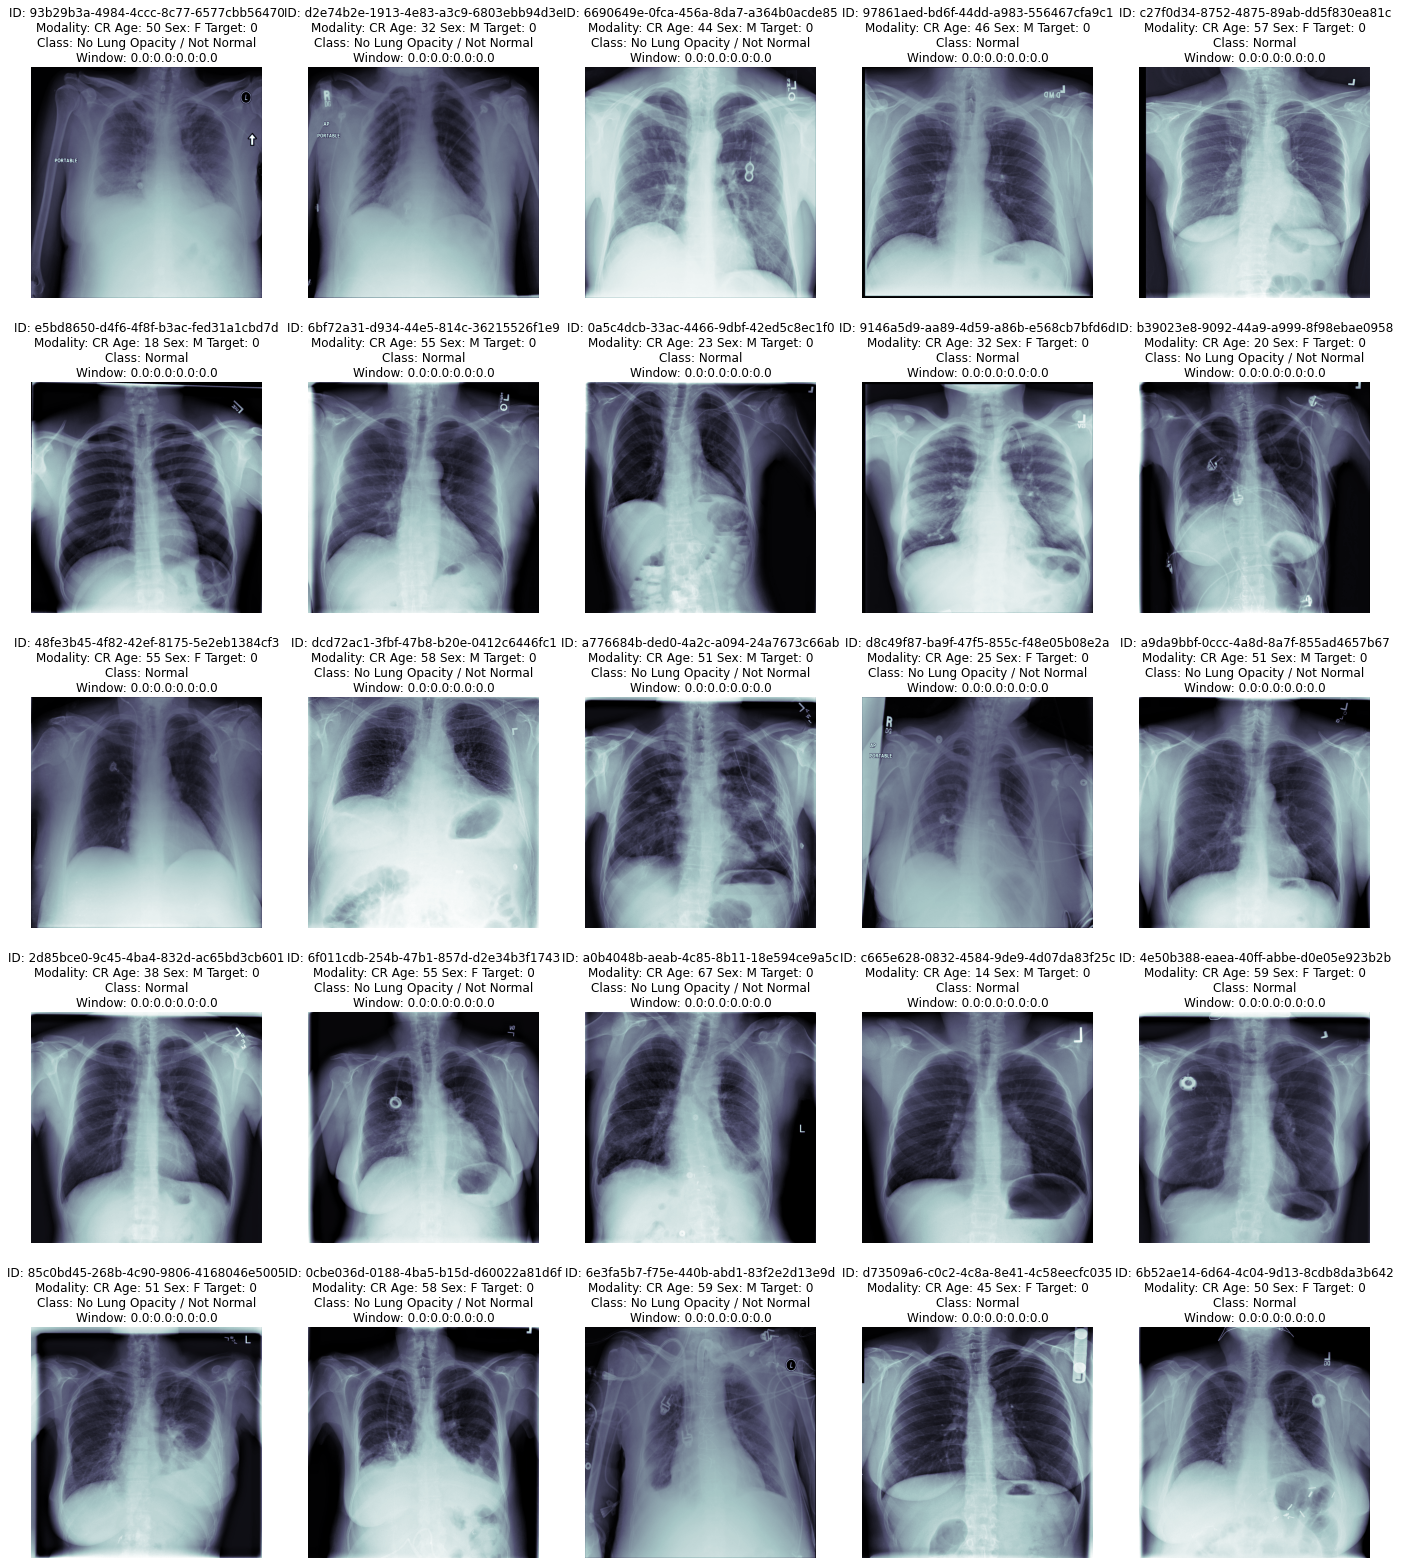

In [ ]:
show_dicom_images(dicom_df[dicom_df['Target']==0].sample(25))

In [ ]:


def show_dicom_images_with_boxes(data):
 img_data = list(data.T.to_dict().values())
 f, ax = plt.subplots(5,5, figsize=(24,28))
 for i,data_row in enumerate(img_data):
  patientImage = data_row['patientId']+'.dcm'
  imagePath = os.path.join(PATH,"stage_2_train_images/",patientImage)
  data_row_img_data = dcm.read_file(imagePath)
  modality = data_row_img_data.Modality
  age = data_row_img_data.PatientAge
  sex = data_row_img_data.PatientSex 
  data_row_img = dcm.dcmread(imagePath)
  ax[i//5, i%5].imshow(data_row_img.pixel_array, cmap=plt.cm.bone)
  ax[i//5, i%5].axis('off')
  ax[i//5, i%5].set_title('ID: {}\nModality: {} Age: {} Sex: {} Target: {}\nClass: {}'.format(                 data_row['patientId'],modality, age, sex, data_row['Target'], data_row['class']))       
  rows = dicom_df[dicom_df['patientId']==data_row['patientId']]
  box_data = list(rows.T.to_dict().values())
  for j, row in enumerate(box_data):
      ax[i//5, i%5].add_patch(Rectangle(xy=(row['x'], row['y']),width=row['width'],height=row['height'],color="blue",alpha = 0.1)) 
 plt.show()






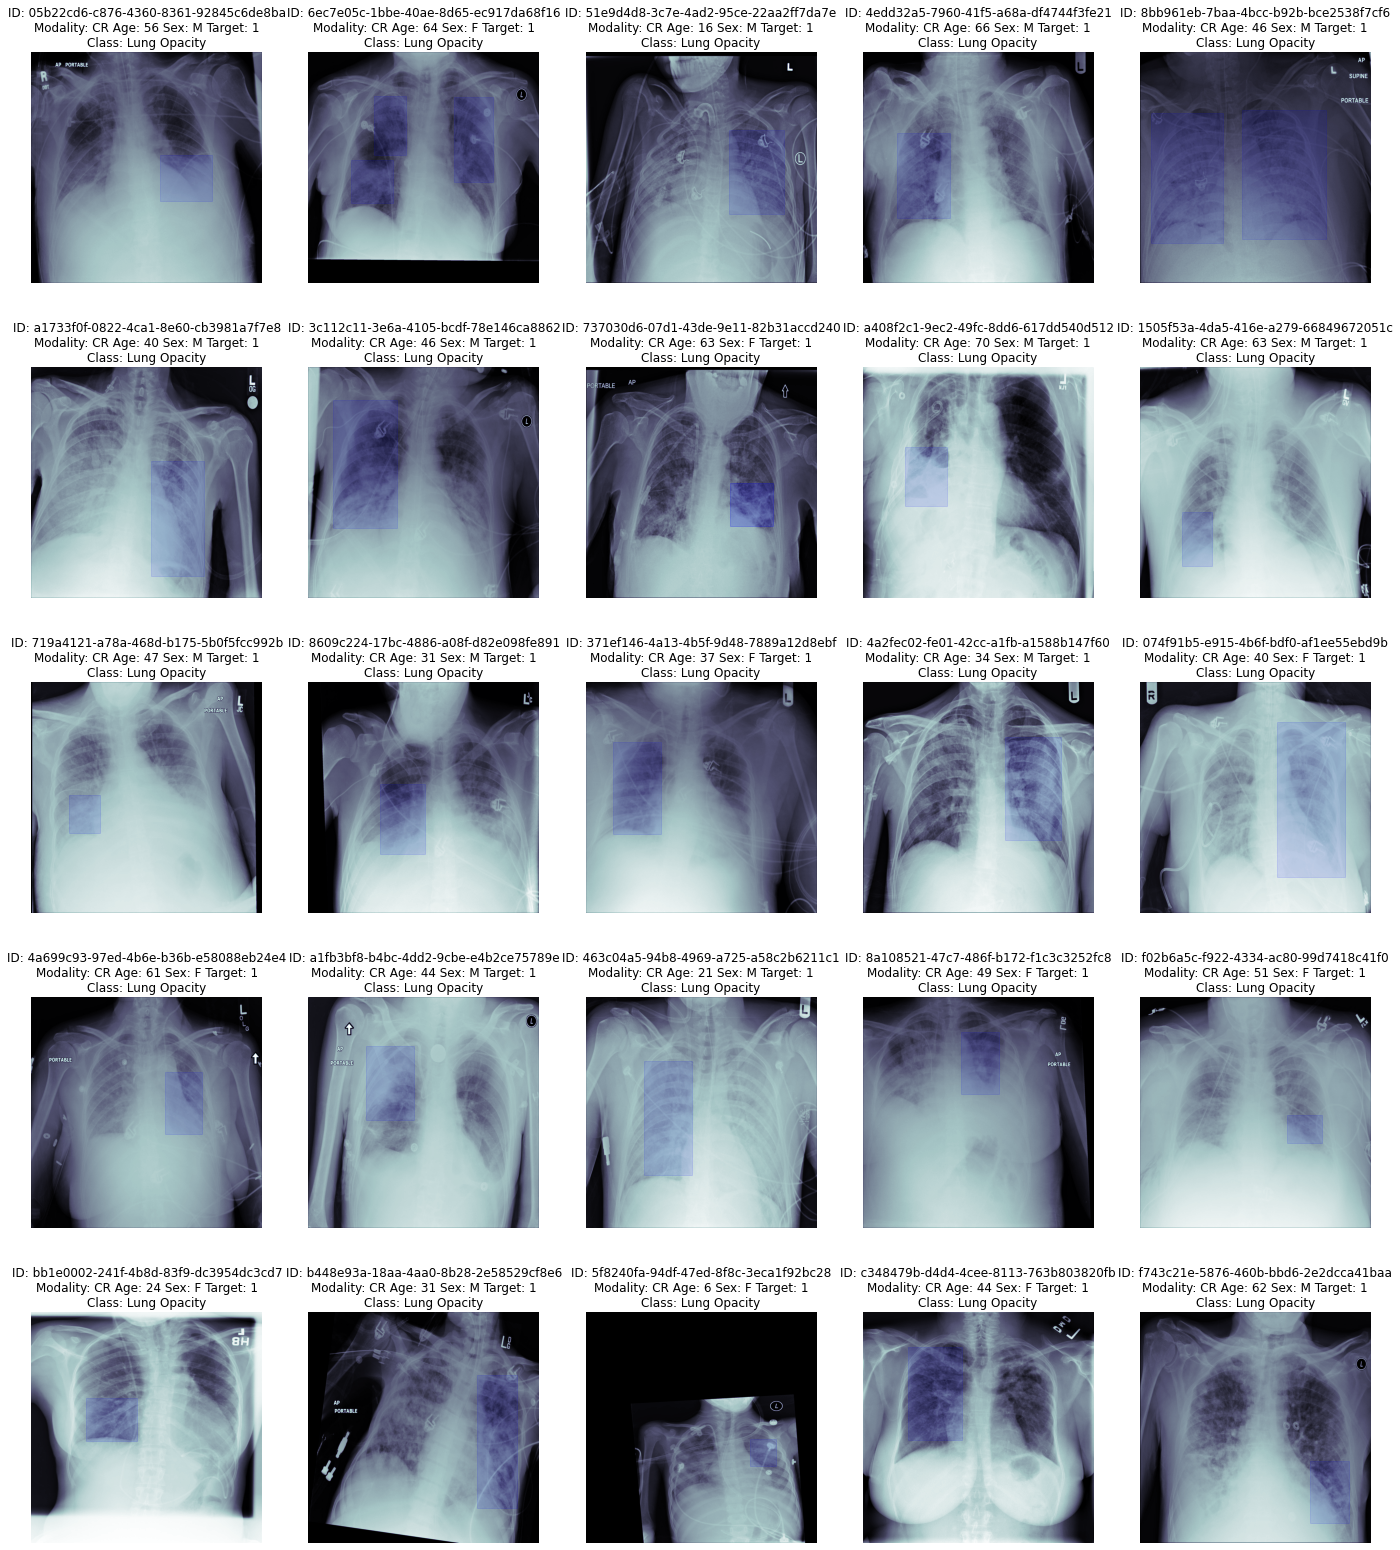

In [ ]:
from matplotlib.patches import Rectangle
show_dicom_images_with_boxes(dicom_df[dicom_df['Target']==1].sample(25))

In [ ]:
dicom_df = process_dicom_data(dicom_df)

In [ ]:
dicom_df = dicom_df.astype({"PatientAge": int})
dicom_df.fillna(0.0, inplace=True)
dicom_df.head(10)

patientId  ...                                          PixelData
579    07624954-ac9b-42d4-9de3-9d35a18df062  ...  b'\xfe\xff\x00\xe0\x00\x00\x00\x00\xfe\xff\x00...
12552  6b82bee3-afeb-47da-8db2-7a0195438d3b  ...  b'\xfe\xff\x00\xe0\x00\x00\x00\x00\xfe\xff\x00...
14352  7725f6fc-d01d-4f4c-b0da-dee26ed91f52  ...  b'\xfe\xff\x00\xe0\x00\x00\x00\x00\xfe\xff\x00...
28245  c93a4ab9-f06d-4851-a596-7778ea749c70  ...  b'\xfe\xff\x00\xe0\x00\x00\x00\x00\xfe\xff\x00...
19577  99411044-20f4-43a7-a9db-699ddbf7049b  ...  b'\xfe\xff\x00\xe0\x00\x00\x00\x00\xfe\xff\x00...
14995  7b81c6fd-68e9-4e25-a642-d296deb28ed3  ...  b'\xfe\xff\x00\xe0\x00\x00\x00\x00\xfe\xff\x00...
6628   405dcab3-d806-46ff-83bf-62829ed2710f  ...  b'\xfe\xff\x00\xe0\x00\x00\x00\x00\xfe\xff\x00...
33581  f04723d9-be85-45bd-a5aa-1bc85776345c  ...  b'\xfe\xff\x00\xe0\x00\x00\x00\x00\xfe\xff\x00...
32232  e6e39bc5-31f7-4315-a9f0-18a86d339c5f  ...  b'\xfe\xff\x00\xe0\x00\x00\x00\x00\xfe\xff\x00...
13280  7080d43d-623b-4e63-935e-9ea66597fa6c  ...  b'\xfe\xff\x00\xe0\x00\x00\x00\x00\xfe\xff\x00...

[10 rows x 14 columns]

In [ ]:
dicom_df['patientId'].nunique()

1980

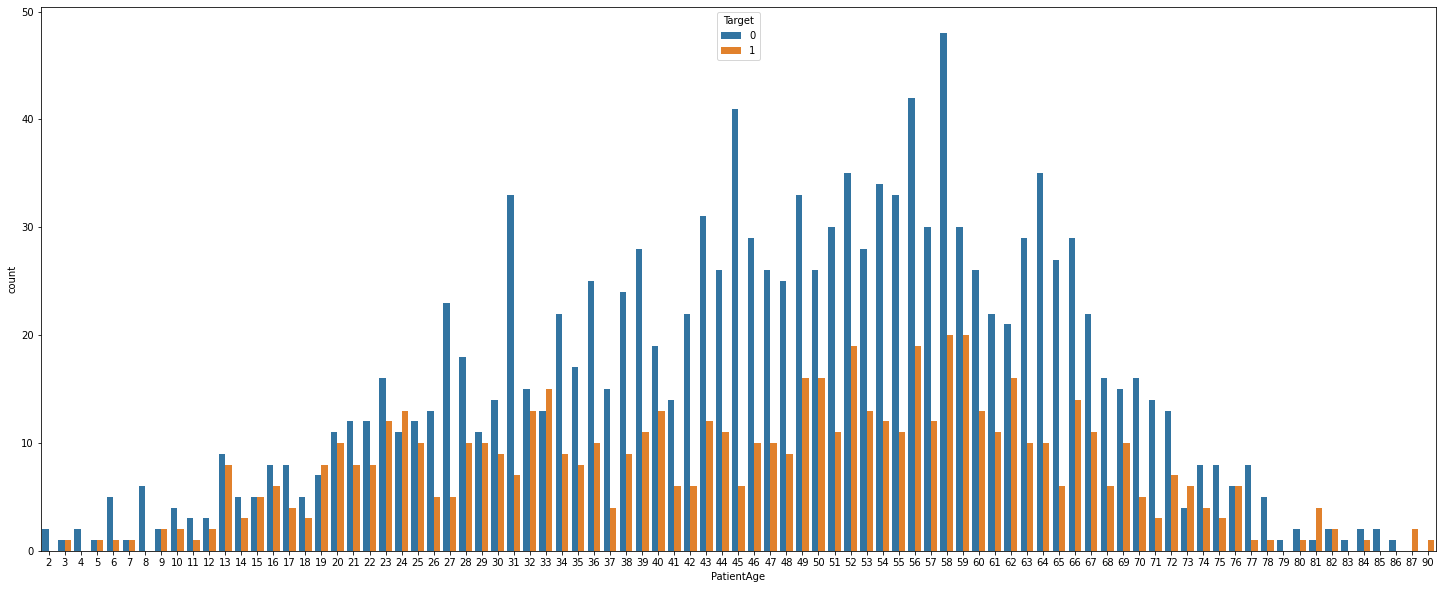

In [ ]:
plt.figure(figsize = (25, 10))
sns.countplot(x = 'PatientAge', hue = 'Target', data = dicom_df)

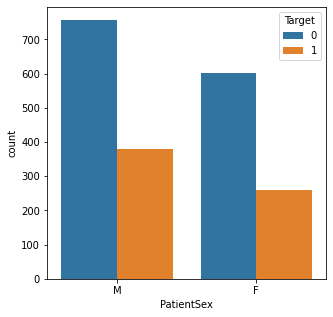

In [ ]:
plt.figure(figsize = (5, 5))
sns.countplot(x = 'PatientSex', hue = 'Target', data = dicom_df)

In [ ]:
dicom_df['ViewPosition'].unique()

array(['PA', 'AP'], dtype=object)

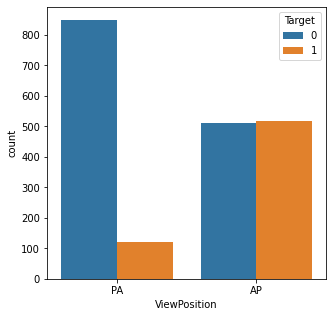

In [ ]:
plt.figure(figsize = (5, 5))
sns.countplot(x = 'ViewPosition', hue = 'Target', data = dicom_df)

In [18]:
import keras
import tensorflow as tf
from keras.models import Model
from keras.layers import Input, BatchNormalization, Activation, Dense, Dropout
from keras.layers.convolutional import Conv2D, Conv2DTranspose
from keras.layers.pooling import MaxPooling2D, GlobalMaxPool2D
from keras.layers.merge import concatenate, add
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.optimizers import Adam

from skimage import measure
from skimage.transform import resize

In [19]:
class generator_single_channel(keras.utils.Sequence):
    
    def __init__(self, folder, filenames, pneumonia_locations=None, batch_size=32,
                 image_size=256, shuffle=True, predict=False):
        self.folder = folder
        self.filenames = filenames
        self.pneumonia_locations = pneumonia_locations
        self.batch_size = batch_size
        self.image_size = image_size
        self.shuffle = shuffle
        self.predict = predict
        self.on_epoch_end()
        
    def __load__(self, filename):
        # load dicom file as numpy array
        img = pydicom.dcmread(os.path.join(self.folder, filename)).pixel_array
        # create empty mask
        msk = np.zeros(img.shape)
        # get filename without extension
        filename = filename.split('.')[0]
        # if image contains pneumonia
        is_pneumonia = int(0)
        if filename in self.pneumonia_locations:
            # loop through pneumonia
            is_pneumonia = int(1)
            for location in self.pneumonia_locations[filename]:
                # add 1's at the location of the pneumonia
                x, y, w, h = location
                msk[y:y+h, x:x+w] = 1
        # resize both image and mask
        img = resize(img, (self.image_size, self.image_size), mode='reflect')
        msk = resize(msk, (self.image_size, self.image_size), mode='reflect')
        # if augment then horizontal flip half the time
        # if self.augment and random.random() > 0.5:
        #     img = np.fliplr(img)
        #     msk = np.fliplr(msk)

        # add trailing channel dimension
        img = np.expand_dims(img, axis=-1)
        msk = np.expand_dims(msk, axis=-1)
        is_pneumonia = np.array(is_pneumonia)

        return img, msk
    
    def __loadpredict__(self, filename):
        # load dicom file as numpy array
        img = pydicom.dcmread(os.path.join(self.folder, filename)).pixel_array
        # resize image
        img = resize(img, (self.image_size, self.image_size), mode='reflect')
        # add trailing channel dimension
        img = np.expand_dims(img, axis=-1)
        
        return img
        
    def __getitem__(self, index):
        # select batch
        filenames = self.filenames[index*self.batch_size:(index+1)*self.batch_size]
        # predict mode: return images and filenames
        if self.predict:
            # load files
            imgs = [self.__loadpredict__(filename) for filename in filenames]
            # create numpy batch
            imgs = np.array(imgs)
            
            return imgs,filenames
        # train mode: return images and masks
        else:
            # load files
            items = [self.__load__(filename) for filename in filenames]
            # unzip images and masks
            imgs, msks = zip(*items)
            # create numpy batch
            imgs = np.array(imgs)
            msks = np.array(msks)

            return imgs,msks
        
    def on_epoch_end(self):
        if self.shuffle:
            random.shuffle(self.filenames)
        
    def __len__(self):
        if self.predict:
            # return everything
            return int(np.ceil(len(self.filenames) / self.batch_size))
        else:
            # return full batches only
            return int(len(self.filenames) / self.batch_size)

In [24]:
def conv2d_block(input_tensor, n_filters, kernel_size=3, batchnorm=True):
    # first layer
    x = Conv2D(filters=n_filters, kernel_size=(kernel_size, kernel_size), kernel_initializer="he_normal",
               padding="same")(input_tensor)
    if batchnorm:
        x = BatchNormalization()(x)
    x = Activation("relu")(x)
    # second layer
    x = Conv2D(filters=n_filters, kernel_size=(kernel_size, kernel_size), kernel_initializer="he_normal",
               padding="same")(x)
    if batchnorm:
        x = BatchNormalization()(x)
    x = Activation("relu")(x)
    return x

In [25]:
def get_unet(input_img, n_filters=16, dropout=0.5, batchnorm=True):
    # contracting path
    c1 = conv2d_block(input_img, n_filters=n_filters*1, kernel_size=3, batchnorm=batchnorm)
    p1 = MaxPooling2D((2, 2)) (c1)
    p1 = Dropout(dropout*0.5)(p1)

    c2 = conv2d_block(p1, n_filters=n_filters*2, kernel_size=3, batchnorm=batchnorm)
    p2 = MaxPooling2D((2, 2)) (c2)
    p2 = Dropout(dropout)(p2)

    c3 = conv2d_block(p2, n_filters=n_filters*4, kernel_size=3, batchnorm=batchnorm)
    p3 = MaxPooling2D((2, 2)) (c3)
    p3 = Dropout(dropout)(p3)

    c4 = conv2d_block(p3, n_filters=n_filters*8, kernel_size=3, batchnorm=batchnorm)
    p4 = MaxPooling2D(pool_size=(2, 2)) (c4)
    p4 = Dropout(dropout)(p4)
    
    c5 = conv2d_block(p4, n_filters=n_filters*16, kernel_size=3, batchnorm=batchnorm)
    
    # expansive path
    u6 = Conv2DTranspose(n_filters*8, (3, 3), strides=(2, 2), padding='same') (c5)
    u6 = concatenate([u6, c4])
    u6 = Dropout(dropout)(u6)
    c6 = conv2d_block(u6, n_filters=n_filters*8, kernel_size=3, batchnorm=batchnorm)

    u7 = Conv2DTranspose(n_filters*4, (3, 3), strides=(2, 2), padding='same') (c6)
    u7 = concatenate([u7, c3])
    u7 = Dropout(dropout)(u7)
    c7 = conv2d_block(u7, n_filters=n_filters*4, kernel_size=3, batchnorm=batchnorm)

    u8 = Conv2DTranspose(n_filters*2, (3, 3), strides=(2, 2), padding='same') (c7)
    u8 = concatenate([u8, c2])
    u8 = Dropout(dropout)(u8)
    c8 = conv2d_block(u8, n_filters=n_filters*2, kernel_size=3, batchnorm=batchnorm)

    u9 = Conv2DTranspose(n_filters*1, (3, 3), strides=(2, 2), padding='same') (c8)
    u9 = concatenate([u9, c1], axis=3)
    u9 = Dropout(dropout)(u9)
    c9 = conv2d_block(u9, n_filters=n_filters*1, kernel_size=3, batchnorm=batchnorm)
    
    outputs = Conv2D(1, (1, 1), activation='sigmoid') (c9)
    model = Model(inputs=[input_img], outputs=[outputs])
    return model

In [26]:
input_img = Input((224, 224, 1), name='img')
model = get_unet(input_img, n_filters=16, dropout=0.05, batchnorm=True)
model.summary()

Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
img (InputLayer)                [(None, 224, 224, 1) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 224, 224, 16) 160         img[0][0]                        
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 224, 224, 16) 64          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 224, 224, 16) 0           batch_normalization[0][0]        
_______________________________________________________________________________________

In [27]:
def iou_loss(y_true, y_pred):
    y_true = tf.reshape(y_true, [-1])
    y_pred = tf.reshape(y_pred, [-1])
    intersection = tf.reduce_sum(y_true * y_pred)
    score = (intersection + 1.) / (tf.reduce_sum(y_true) + tf.reduce_sum(y_pred) - intersection + 1.)
    return 1 - score

# def bce_loss(y_true,y_pred):
#   return keras.losses.binary_crossentropy(y_true,y_pred)

# mean iou as a metric
def mean_iou(y_true, y_pred):
    y_pred = tf.round(y_pred)
    intersect = tf.reduce_sum(y_true * y_pred)
    union = tf.reduce_sum(y_true) + tf.reduce_sum(y_pred)
    smooth = tf.ones(tf.shape(intersect))
    return tf.reduce_mean((intersect + smooth) / (union - intersect + smooth))

In [28]:
model.compile(optimizer='adam',
                     loss=iou_loss,
                     metrics=[mean_iou,'accuracy'])

checkpoint = keras.callbacks.ModelCheckpoint("pnuemonia-detection-unet_{val_loss:.4f}.h5",monitor='val_loss',
                             verbose=1, save_best_only=False,save_weights_only=True, mode="auto")

es = keras.callbacks.EarlyStopping(monitor='val_loss', patience=4)

In [29]:
# empty dictionary
pneumonia_locations = {}
# load table
with open(os.path.join('/content/stage_2_train_labels.csv'), mode='r') as infile:
    # open reader
    reader = csv.reader(infile)
    # skip header
    next(reader, None)
    # loop through rows
    for rows in reader:
        # retrieve information
        filename = rows[0]
        location = rows[1:5]
        pneumonia = rows[5]
        # if row contains pneumonia add label to dictionary
        # which contains a list of pneumonia locations per filename
        if pneumonia == '1':
            # convert string to float to int
            location = [int(float(i)) for i in location]
            # save pneumonia location in dictionary
            if filename in pneumonia_locations:
                pneumonia_locations[filename].append(location)
            else:
                pneumonia_locations[filename] = [location]

In [30]:
folder = '/content/stage_2_train_images/'
filenames = os.listdir(folder)
random.shuffle(filenames)
# split into train and validation filenames
n_valid_samples = 6000
train_filenames = filenames[n_valid_samples:]
valid_filenames = filenames[:n_valid_samples]
print('n train samples', len(train_filenames))
print('n valid samples', len(valid_filenames))
n_train_samples = len(filenames) - n_valid_samples

n train samples 20684
n valid samples 6000


In [31]:
# create train and validation generators
train_gen_simple = generator_single_channel(folder, train_filenames, pneumonia_locations, batch_size=64, image_size=224, shuffle=True, predict=False)
valid_gen_simple = generator_single_channel(folder, valid_filenames, pneumonia_locations, batch_size=64, image_size=224, shuffle=False, predict=False)


In [ ]:
history = model.fit_generator(train_gen_simple, validation_data=valid_gen_simple, callbacks=[checkpoint,es], epochs=1)

323/323 [==============================] - ETA: 0s - loss: 0.8453 - mean_iou: 0.1931 - accuracy: 0.9160 
Epoch 00001: saving model to pnuemonia-detection-unet_0.9334.h5
323/323 [==============================] - 16665s 52s/step - loss: 0.8453 - mean_iou: 0.1931 - accuracy: 0.9160 - val_loss: 0.9334 - val_mean_iou: 0.0671 - val_accuracy: 0.6480


In [ ]:
!ls

 competitions			        stage_2_detailed_class_info.csv
 drive				        stage_2_sample_submission.csv
'GCP Credits Request Link - RSNA.txt'   stage_2_test_images
 pnuemonia-detection-unet_0.9334.h5     stage_2_train_images
 sample_data			        stage_2_train_labels.csv


In [32]:
!cp  /content/drive/My\ Drive/pnuemonia-detection-unet_0.9334.h5 .

In [ ]:
!cp  pnuemonia-detection-unet_0.9334.h5  /content/drive/My\ Drive/

In [33]:
!pip install scikit-image

In [34]:
import pandas as pd 
from skimage.segmentation import mark_boundaries
from skimage.measure import label, regionprops
import matplotlib.pyplot as plt
import matplotlib as mpl
import cv2

In [ ]:
!ls ../content/

 competitions			        stage_2_detailed_class_info.csv
 drive				        stage_2_sample_submission.csv
'GCP Credits Request Link - RSNA.txt'   stage_2_test_images
 pnuemonia-detection-unet_0.9334.h5     stage_2_train_images
 sample_data			        stage_2_train_labels.csv


In [35]:
model.load_weights('../content/pnuemonia-detection-unet_0.9334.h5')

In [ ]:
!pwd

/content


In [ ]:
!ls 

 competitions			        stage_2_sample_submission.csv
'GCP Credits Request Link - RSNA.txt'   stage_2_test_images
 pnuemonia-detection-unet_0.9447.h5     stage_2_test_images_tst
 sample_data			        stage_2_train_images
 stage_2_detailed_class_info.csv        stage_2_train_labels.csv


In [36]:
from skimage import measure
from skimage.transform import resize

In [37]:
!rm -rf test_output_result.csv


with open('test_output_result.csv', 'w', newline='') as file:
             order = csv.writer(file)
             order.writerow(['patientId', 'x', 'y', 'width', 'height', 'Target'])
            


folder = '../content/stage_2_test_images'
test_filenames = os.listdir(folder)
print('n test samples:', len(test_filenames))

# create test generator with predict flag set to True
test_gen = generator_single_channel(folder, test_filenames, None, batch_size=20, image_size=224, shuffle=False, predict=True)

# create submission dictionary
submission_dict = {}
# loop through testset
for imgs, filenames in test_gen:
    # predict batch of images
    preds = model.predict(imgs)
    # loop through batch
    for pred, filename in zip(preds, filenames):
        # resize predicted mask
        pred = resize(pred, (1024, 1024), mode='reflect')
        # threshold predicted mask
        comp = pred[:, :, 0] > 0.85
        # apply connected components
        comp = measure.label(comp)
        # apply bounding boxes
        confidence_score = ''
        x = 0
        y = 0
        width = 0
        height = 0
        
        for region in measure.regionprops(comp):
            # retrieve x, y, height and width
            y, x, y2, x2 = region.bbox
            height = y2 - y
            width = x2 - x
            tot = height + width
            TARGET = 0
            conf = np.mean(pred[y:y+height, x:x+width])     #confidence score  
            filename = filename.split('.')[0]
            if conf > 0.85 :              
              if tot > 100 :
                TARGET = 1
              else :      #if confidence score < 0.85 mask removed
                x = 0
                y = 0
                width = 0
                height = 0
     
        with open('test_output_result.csv', 'a', newline='') as file:
         order = csv.writer(file)
         #    order.writerow(['filename', 'confidence_score', 'x', 'y', 'width', 'height'])
         order.writerow([filename, x, y, width, height, TARGET])
           
        

n test samples: 3000


In [38]:
df_test = pd.read_csv('/content/test_output_result.csv')
df_test.head(100)

patientId    x    y  width  height  Target
0   30ed769a-8105-47a0-8d1a-4692f5df5fad  109  676    254     334       1
1   0050f8bb-36a4-4a1a-8de5-2d73154c2571  207  792    185     195       0
2   03a37eda-cff4-4ad9-b5d7-5f9ab9dbbfe3   68  182    936     842       0
3   233e0be9-7a88-48f7-b5e3-af50cb2ccb4b  910  238     61     119       1
4   1ac5642f-fbcd-45a2-863c-bccd1090b6fb  622  845     96     114       0
..                                   ...  ...  ...    ...     ...     ...
95  14ba4cea-0fd8-40a9-aa01-4e6c05da9fa5  176  434    793     590       0
96  27eef917-370c-41a9-b97a-07fd4cf3fb33  258  105    738     919       0
97  2b111931-60e8-4281-8f76-a7181ae96837   95  729    598     289       0
98  03fc4207-b6f6-4c97-8d55-8f624ea91c50  203   67    810     957       1
99  11592fdd-4318-472c-ae9c-6f3a54d17f51  626  865     98     119       0

[100 rows x 6 columns]

In [39]:
df_test.shape

(3000, 6)

In [40]:
!cp ./test_output_result.csv /content/drive/My\ Drive/

In [51]:

from matplotlib.patches import Rectangle
def show_dicom_images_with_boxes_test(data):
 img_data = list(data.T.to_dict().values())
 f, ax = plt.subplots(3,3, figsize=(16,20))
 for i,data_row in enumerate(img_data):
  patientImage = data_row['patientId']+'.dcm'
  imagePath = os.path.join(PATH,"stage_2_test_images/",patientImage)
  data_row_img_data = dcm.read_file(imagePath)
  modality = data_row_img_data.Modality
  age = data_row_img_data.PatientAge
  sex = data_row_img_data.PatientSex 
  data_row_img = dcm.dcmread(imagePath)
  ax[i//3, i%3].imshow(data_row_img.pixel_array, cmap=plt.cm.bone)
  ax[i//3, i%3].axis('off')
  ax[i//3, i%3].set_title('ID: {}\nModality: {} Age: {} Sex: {} Target: {}'.format(                 data_row['patientId'],modality, age, sex, data_row['Target']))       
  rows = df_test[df_test['patientId']==data_row['patientId']]
  box_data = list(rows.T.to_dict().values())
  for j, row in enumerate(box_data):
      ax[i//3, i%3].add_patch(Rectangle(xy=(row['x'], row['y']),width=row['width'],height=row['height'],color="red",alpha = 0.1)) 
 plt.show()

In [ ]:
#Output of the test data with mask details

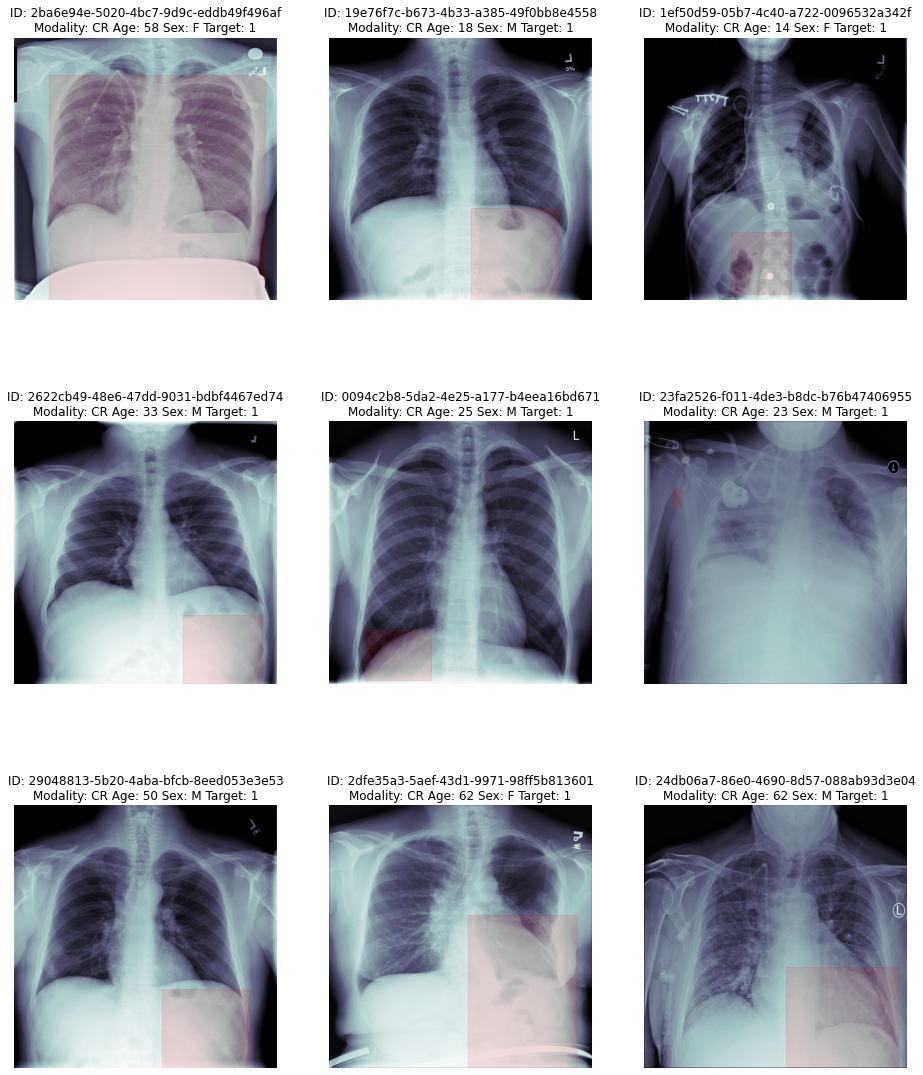

In [60]:
show_dicom_images_with_boxes_test(df_test[df_test['Target']==1].sample(9))